# Презентационный проект по методу К-близжайших соседей.

Сонар (ультразвуковой локатор) - это техника использования звука для навигации, коммуникации с объектами и определения объектов на воде или под водой, например морских судов.

Данный набор данных содержит ответные метрики для 60 различных частот сонара, отправленных на известные объекты - мины и камни. Для каждого отправленного и полученного сигнала были записаны данные об объекте, на который направлялся сонар (мина или камень). 

Наша цель - создать модель машинного обучения, которая может определить тип объекта (мина или камень) на основе ответа от сонаров на 60 различных частотах.

**Импортируем необходимые библиотеки.**

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Производим импорт Data frame.**

In [51]:
df = pd.read_csv('K_Nearest_Neighbors_Project_Data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


**Str на Int.**

Меняем формат данных Целевой переменной с str на int.

С целью упрощения расчётов.

In [52]:
df['Target'] = df['Label'].map({'R':0,'M':1})
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


**Разбивка данных.**

In [53]:
from sklearn.model_selection import train_test_split 

In [54]:
X = df.drop(['Target','Label'],axis=1)

In [55]:
y = df['Label']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Масштабирование данных. Построение Pipeline.**

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
scaler = StandardScaler()

In [60]:
knn = KNeighborsClassifier()

In [61]:
operations = [('scaler',scaler),('knn',knn)]

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline(operations)

**Поиск оптимальных значений гиперпараметров. Обучение модели.**

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
k_values = list(range(1,30))

In [66]:
param_grid = {'knn__n_neighbors': k_values}

In [67]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [68]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [69]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**Работа с метриками.**

Рассматриваем различные значения accuracy при различных значениях К.

Вывод при росте К метрика accuracy падает.

Оптимальное К == 1, что и выдал GridSearchCV.

In [70]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.88250356, 0.82930299, 0.85049787, 0.76486486, 0.78634424,
       0.75931721, 0.78122333, 0.73285917, 0.7487909 , 0.7116643 ,
       0.70625889, 0.70640114, 0.72759602, 0.70640114, 0.73271693,
       0.72745377, 0.72759602, 0.70611664, 0.70611664, 0.69004267,
       0.69004267, 0.69530583, 0.72716927, 0.70056899, 0.72702703,
       0.71123755, 0.71664296, 0.7059744 , 0.72731152])

Text(0, 0.5, 'Accuracy')

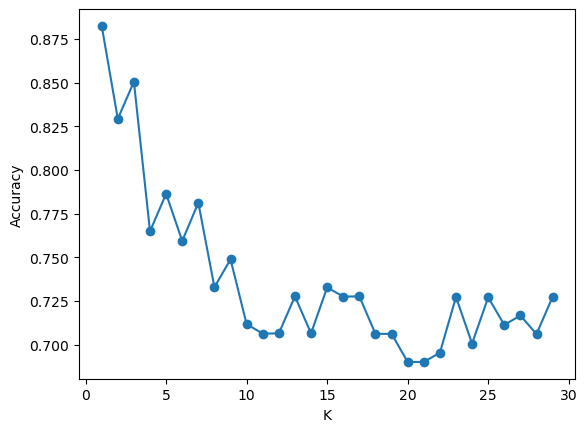

In [71]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

**Рассматриваем Матрицу ошибок.**

3 наблюдения из 21 были неправильно классифицированы.

In [72]:
y_pred = full_cv_classifier.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [75]:
confusion_matrix(y_test,y_pred)

array([[9, 2],
       [1, 9]], dtype=int64)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.90      0.82      0.86        11
           R       0.82      0.90      0.86        10

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21



**Работа с новыми данными.**

Наблюдение классифицировано как М == 1 == Мина.

С вероятностью 1 == 100%.

In [78]:
new_data = [[0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,
             0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,
             0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,
             0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,
             0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,
             0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,]]

In [79]:
full_cv_classifier.predict(new_data)

C:\Users\AdminPC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)

In [80]:
full_cv_classifier.predict_proba(new_data)

C:\Users\AdminPC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])